<a href="https://colab.research.google.com/github/amrutha-m-sajeev/Machine-learning-using-Navie-Bayes-Algorithm/blob/main/lung_cancer_prediction_navie_bayse_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/lung_cancer_examples.csv')
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [2]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
df.tail()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
54,Ernest,Borgnine,26,13,6,1,0
55,Alec,Guinness,77,20,5,4,1
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0


In [4]:
df.drop(['Name','Surname'],axis='columns',inplace=True)
df

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0
8,45,2,6,0,0
9,52,18,4,5,1


In [5]:
df.isna().sum()

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


In [7]:
x=df.iloc[:,:-1].values
x

array([[35,  3,  5,  4],
       [27, 20,  2,  5],
       [30,  0,  5,  2],
       [28,  0,  8,  1],
       [68,  4,  5,  6],
       [34,  0, 10,  0],
       [58, 15, 10,  0],
       [22, 12,  5,  2],
       [45,  2,  6,  0],
       [52, 18,  4,  5],
       [33,  4,  8,  0],
       [18, 10,  6,  3],
       [25,  2,  5,  1],
       [28, 20,  2,  8],
       [34, 25,  4,  8],
       [39, 18,  8,  1],
       [42, 22,  3,  5],
       [19, 12,  8,  0],
       [62,  5,  4,  3],
       [73, 10,  7,  6],
       [55, 15,  1,  3],
       [33,  8,  8,  1],
       [22, 20,  6,  2],
       [44,  5,  8,  1],
       [77,  3,  2,  6],
       [21, 20,  5,  3],
       [37, 15,  6,  2],
       [34, 12,  8,  0],
       [55, 20,  1,  4],
       [40, 20,  2,  7],
       [36, 13,  5,  2],
       [56, 20,  3,  3],
       [47, 15,  1,  8],
       [62, 25,  3,  4],
       [26, 10,  7,  2],
       [25, 20,  8,  2],
       [59, 20,  3,  4],
       [62, 15,  5,  5],
       [33, 25,  8,  2],
       [37, 10,  5,  3],


In [8]:
y=df.iloc[:,-1].values
y

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [9]:
x.ndim

2

In [10]:
y.ndim

1

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[26, 13,  6,  1],
       [73, 10,  7,  6],
       [36, 13,  5,  2],
       [42, 12,  6,  2],
       [39, 15,  7,  2],
       [77, 20,  5,  4],
       [39, 18,  8,  1],
       [52, 18,  4,  5],
       [34, 12,  8,  0],
       [37, 15,  6,  2],
       [42, 22,  3,  5],
       [77,  3,  2,  6],
       [62, 25,  3,  4],
       [75, 15,  3,  5],
       [47, 12,  8,  0],
       [18, 10,  6,  3],
       [47, 15,  1,  8],
       [26, 34,  1,  8],
       [50, 20,  2,  4],
       [62, 15,  5,  5],
       [40, 20,  2,  7],
       [63, 20,  4,  5],
       [27, 20,  2,  5],
       [33,  8,  8,  1],
       [30,  0,  5,  2],
       [31, 20,  9,  4],
       [37, 10,  5,  3],
       [25, 20,  8,  2],
       [44,  5,  8,  1],
       [53, 20,  6,  3],
       [33,  4,  8,  0],
       [22, 20,  6,  2],
       [62,  5,  4,  3],
       [51, 25,  9,  0],
       [55, 15,  1,  3],
       [22, 12,  5,  2],
       [69, 20,  5,  4],
       [34, 25,  4,  8],
       [55, 20,  1,  4],
       [44, 30,  1,  6],


In [12]:
x_test

array([[35,  3,  5,  4],
       [34,  0, 10,  0],
       [26, 10,  7,  2],
       [28, 20,  2,  8],
       [21, 20,  8,  3],
       [35, 20,  5,  1],
       [43, 30,  3,  8],
       [21, 20,  5,  3],
       [28, 10,  4,  1],
       [25,  2,  5,  1],
       [62, 20,  5,  6],
       [28,  0,  8,  1],
       [59, 20,  3,  4],
       [56, 20,  3,  3],
       [45,  2,  6,  0],
       [19, 12,  8,  0],
       [58, 15, 10,  0],
       [68,  4,  5,  6]])

In [13]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [14]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[-1.15393627, -0.43269425,  0.40496913, -1.08797778],
       [ 1.7796194 , -0.84848639,  0.80993827,  1.1649055 ],
       [-0.52977549, -0.43269425,  0.        , -0.63740112],
       [-0.15527902, -0.57129163,  0.40496913, -0.63740112],
       [-0.34252726, -0.1554995 ,  0.80993827, -0.63740112],
       [ 2.02928371,  0.53748739,  0.        ,  0.26375219],
       [-0.34252726,  0.26029264,  1.2149074 , -1.08797778],
       [ 0.46888176,  0.26029264, -0.40496913,  0.71432885],
       [-0.65460765, -0.57129163,  1.2149074 , -1.53855444],
       [-0.46735941, -0.1554995 ,  0.40496913, -0.63740112],
       [-0.15527902,  0.81468215, -0.80993827,  0.71432885],
       [ 2.02928371, -1.81866804, -1.2149074 ,  1.1649055 ],
       [ 1.09304254,  1.23047428, -0.80993827,  0.26375219],
       [ 1.90445155, -0.1554995 , -0.80993827,  0.71432885],
       [ 0.15680137, -0.57129163,  1.2149074 , -1.53855444],
       [-1.6532649 , -0.84848639,  0.40496913, -0.18682447],
       [ 0.15680137, -0.

In [16]:
x_test

array([[-0.21930389, -1.09065725, -0.28867513,  0.4472136 ],
       [-0.28401652, -1.42913709,  1.87638837, -1.08609016],
       [-0.80171751, -0.30087097,  0.57735027, -0.31943828],
       [-0.67229227,  0.82739516, -1.58771324,  1.98051735],
       [-1.12528064,  0.82739516,  1.01036297,  0.06388766],
       [-0.21930389,  0.82739516, -0.28867513, -0.70276422],
       [ 0.2983971 ,  1.95566128, -1.15470054,  1.98051735],
       [-1.12528064,  0.82739516, -0.28867513,  0.06388766],
       [-0.67229227, -0.30087097, -0.72168784, -0.70276422],
       [-0.86643014, -1.20348386, -0.28867513, -0.70276422],
       [ 1.52793697,  0.82739516, -0.28867513,  1.21386547],
       [-0.67229227, -1.42913709,  1.01036297, -0.70276422],
       [ 1.33379909,  0.82739516, -1.15470054,  0.4472136 ],
       [ 1.13966122,  0.82739516, -1.15470054,  0.06388766],
       [ 0.42782235, -1.20348386,  0.14433757, -1.08609016],
       [-1.25470589, -0.07521774,  1.01036297, -1.08609016],
       [ 1.26908647,  0.

In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [21]:
pred=model.predict(scaler.transform([[26,13,0,1]]))
print(pred)

[1]


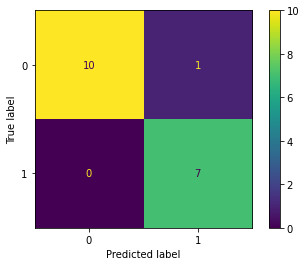

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [23]:
result

array([[10,  1],
       [ 0,  7]])

In [24]:
score=accuracy_score(y_test,y_pred)
score

0.9444444444444444